In [1]:
!pip install networkx==2.5.1

  Using cached networkx-2.5.1-py3-none-any.whl (1.6 MB)
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


In [1]:
import json
import pandas as pd
import numpy as np
import networkx as nx
from networkx.readwrite import json_graph

import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
def color_mapper(lst):
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.turbo)
    
    color_lst = []
    for v in lst:
        color_lst.append(mapper.to_rgba(v))
        
    return color_lst

In [3]:
def plagiarism_score_graph_circular(score_dict,img_path,plagiarism_thres=0.6):
    unique_labels = []
    for key_pairs in score_dict:
        for i in range(2):
            if key_pairs[i] not in unique_labels:
                unique_labels.append(key_pairs[i])
    
    plagiarism_dict = {k:v for k, v in score_dict.items() if v > plagiarism_thres}
    plagiarism_pairs = list(plagiarism_dict.keys())
    weights = list(plagiarism_dict.values())
    
    edges = []
    for pairs in plagiarism_pairs:
        edges.append((unique_labels.index(pairs[0]), unique_labels.index(pairs[1])))
        
    G=nx.Graph()
    G.add_nodes_from(range(len(unique_labels)))
    G.add_edges_from(edges)

    # some labels
    labels = {}
    for i in range(len(unique_labels)):
        labels[i] = unique_labels[i]
    
    plt.figure(figsize=(12,10))
    nx.draw_circular(G, node_color='black', node_size=500, 
                     font_size=20, font_color='gray',
                     labels=labels, alpha=0.9,
                     edge_color=color_mapper(weights),
                     style ='dotted',
                     verticalalignment='bottom',horizontalalignment='left',
                    )
    
    cbar = plt.colorbar(cm.ScalarMappable(cmap=cm.turbo),fraction=0.05,location='top')
    cbar.set_label('Plagiarism Score',size=15)
    plt.axis('equal')
    plt.savefig(img_path, dpi=500, bbox_inches='tight')
    plt.show()

In [4]:
from itertools import combinations

doc_list = [f'essay_{i}' for i in range(1,31)]
doc_pair_combinations = list(combinations(doc_list, 2))

In [5]:
import random
random.seed(0)

score_dict = {}
for pair in doc_pair_combinations:
    score_dict[pair] = random.uniform(0,1)
    
for i,pair in enumerate(score_dict):
    if i>len(score_dict)//2:
        score_dict[pair]=0
        
score_dict

{('essay_1', 'essay_2'): 0.8444218515250481,
 ('essay_1', 'essay_3'): 0.7579544029403025,
 ('essay_1', 'essay_4'): 0.420571580830845,
 ('essay_1', 'essay_5'): 0.25891675029296335,
 ('essay_1', 'essay_6'): 0.5112747213686085,
 ('essay_1', 'essay_7'): 0.4049341374504143,
 ('essay_1', 'essay_8'): 0.7837985890347726,
 ('essay_1', 'essay_9'): 0.30331272607892745,
 ('essay_1', 'essay_10'): 0.4765969541523558,
 ('essay_1', 'essay_11'): 0.5833820394550312,
 ('essay_1', 'essay_12'): 0.9081128851953352,
 ('essay_1', 'essay_13'): 0.5046868558173903,
 ('essay_1', 'essay_14'): 0.28183784439970383,
 ('essay_1', 'essay_15'): 0.7558042041572239,
 ('essay_1', 'essay_16'): 0.6183689966753316,
 ('essay_1', 'essay_17'): 0.25050634136244054,
 ('essay_1', 'essay_18'): 0.9097462559682401,
 ('essay_1', 'essay_19'): 0.9827854760376531,
 ('essay_1', 'essay_20'): 0.8102172359965896,
 ('essay_1', 'essay_21'): 0.9021659504395827,
 ('essay_1', 'essay_22'): 0.3101475693193326,
 ('essay_1', 'essay_23'): 0.72983174826

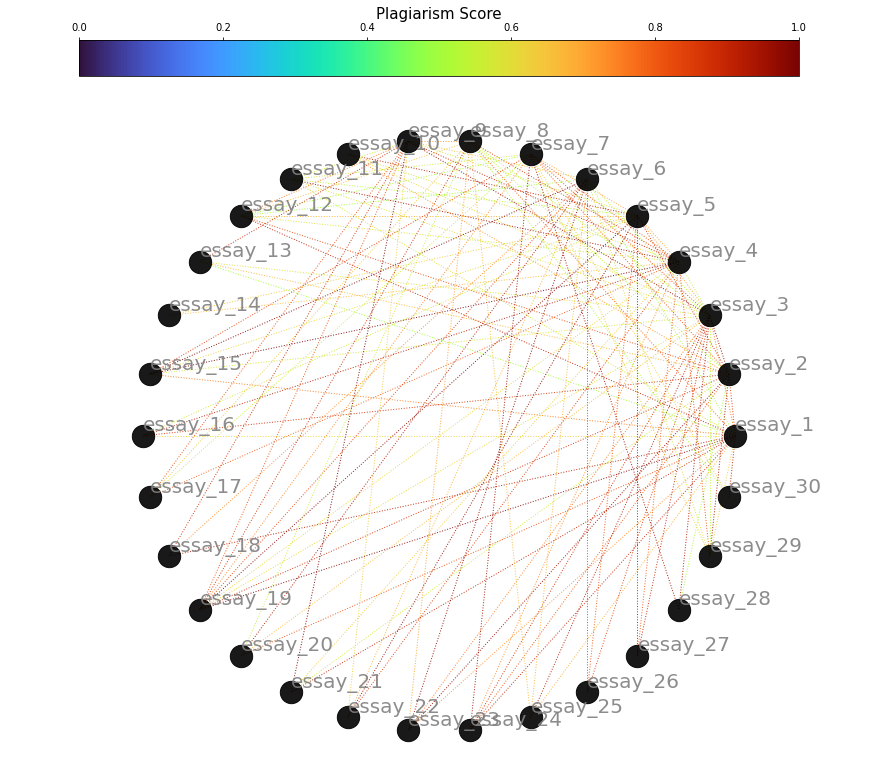

In [88]:
plagiarism_score_graph_circular(score_dict,plagiarism_thres=0.5,img_path='../data/plagiarism_score_graph.png')

In [6]:
def plagiarism_score_graph(score_dict,dict_path,plagiarism_thres=0.6):
    unique_labels = []
    for key_pairs in score_dict:
        for i in range(2):
            if key_pairs[i] not in unique_labels:
                unique_labels.append(key_pairs[i])
    
    plagiarism_dict = {k:v for k, v in score_dict.items() if v > plagiarism_thres}
    plagiarism_pairs = list(plagiarism_dict.keys())
    weights = list(plagiarism_dict.values())
    
    edges = []
    for pairs in plagiarism_pairs:
        edges.append((unique_labels.index(pairs[0]), unique_labels.index(pairs[1])))
        
    G=nx.Graph()
    G.add_nodes_from(range(len(unique_labels)))
    G.add_edges_from(edges)

    # some labels
    labels = {}
    for i in range(len(unique_labels)):
        labels[i] = unique_labels[i]
    
#     df = pd.DataFrame(index=G.nodes(), columns=G.nodes())
#     for row, data in nx.shortest_path_length(G):
#         for col, dist in data.items():
#             df.loc[row,col] = dist

#     df = df.fillna(df.max().max())

#     pos = nx.kamada_kawai_layout(G, dist=df.to_dict())

#     plt.figure(figsize=(12,10))
    
#     nx.draw(G, pos, node_color='seagreen', node_size=500, 
#              font_size=20, font_color='black', font_weight='normal',
#              labels=labels, 
#              alpha=0.9,
#              style='dashdot',
#              edge_color=color_mapper(weights),
#              verticalalignment='bottom',horizontalalignment='center',
#             )
    
#     cbar = plt.colorbar(cm.ScalarMappable(cmap=cm.turbo),fraction=0.05,location='top')
#     cbar.set_label('Plagiarism Score',size=15)
#     plt.axis('equal')
#     plt.savefig(img_path, dpi=500, bbox_inches='tight')
#     plt.show()
    
    d = json_graph.node_link_data(G)

    for i in range(len(d['nodes'])):
        d['nodes'][i]['id'] = labels[d['nodes'][i]['id']]
    
    chosen_links = []
    for i in range(len(d['links'])):
        if weights[i] > plagiarism_thres:
            chosen_links.append(
                                {
                                    'source': labels[d['links'][i]['source']],
                                    'target': labels[d['links'][i]['target']],
                                    'value': weights[i]
                                }
                                )
    
    d['links'] = chosen_links
        
    with open(dict_path,'w') as f_out:
        json.dump(d,f_out)
    
    return d

In [20]:
d = plagiarism_score_graph(score_dict,plagiarism_thres=0.5,dict_path='../graph/force.json')

In [21]:
d

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 'essay_1'},
  {'id': 'essay_2'},
  {'id': 'essay_3'},
  {'id': 'essay_4'},
  {'id': 'essay_5'},
  {'id': 'essay_6'},
  {'id': 'essay_7'},
  {'id': 'essay_8'},
  {'id': 'essay_9'},
  {'id': 'essay_10'},
  {'id': 'essay_11'},
  {'id': 'essay_12'},
  {'id': 'essay_13'},
  {'id': 'essay_14'},
  {'id': 'essay_15'},
  {'id': 'essay_16'},
  {'id': 'essay_17'},
  {'id': 'essay_18'},
  {'id': 'essay_19'},
  {'id': 'essay_20'},
  {'id': 'essay_21'},
  {'id': 'essay_22'},
  {'id': 'essay_23'},
  {'id': 'essay_24'},
  {'id': 'essay_25'},
  {'id': 'essay_26'},
  {'id': 'essay_27'},
  {'id': 'essay_28'},
  {'id': 'essay_29'},
  {'id': 'essay_30'}],
 'links': [{'source': 'essay_1',
   'target': 'essay_2',
   'value': 0.8444218515250481},
  {'source': 'essay_1', 'target': 'essay_3', 'value': 0.7579544029403025},
  {'source': 'essay_1', 'target': 'essay_6', 'value': 0.5112747213686085},
  {'source': 'essay_1', 'target': 'essay_8'